
# SVM-SMOTE
Machine Learning with Imbalanced Data - Course

Creates new samples by interpolation of samples of the support vectors from minority class and its closest neighbours.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

## Create data

In [2]:
# config options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas columns
X = pd.DataFrame(X, columns=['varA', 'varB'])
y = pd.Series(y)

# create an imbalanced Xset
X = pd.concat([
    X[y==0],
    X[y==1].sample(200, random_state=blobs_random_seed)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

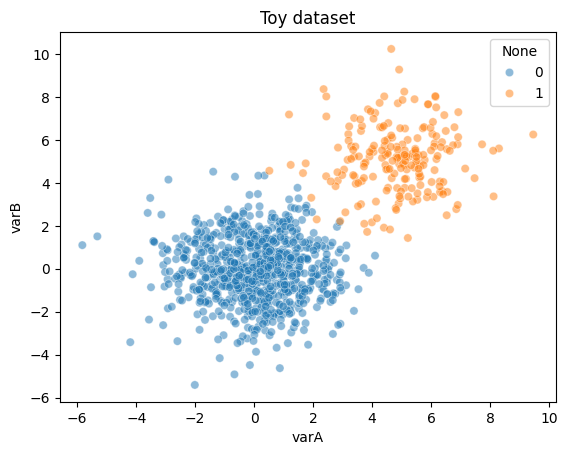

In [3]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Find the support vectors

In [4]:
# initialize SVM classifier
clf = svm.SVC(kernel='linear')

# fit data
clf.fit(X, y)

# support vectors, indices
clf.support_

array([ 83, 149, 160, 172, 301, 351, 761, 804, 855, 866, 886, 912, 914,
       983])

In [5]:
# number of support vectors
len(clf.support_)

14

In [6]:
# the support vectors
clf.support_vectors_

array([[4.09944749, 0.60884504],
       [1.77535036, 2.93553763],
       [1.47134336, 3.76962153],
       [1.50565205, 3.2798539 ],
       [2.80805815, 1.9516362 ],
       [1.96147368, 2.63806038],
       [2.89326262, 2.16529353],
       [2.9167864 , 2.21928182],
       [3.73441837, 2.09369275],
       [3.83287804, 1.71697088],
       [3.09356298, 2.62726245],
       [2.12232876, 2.29678811],
       [1.93680649, 3.30373166],
       [0.51494372, 4.56264752]])

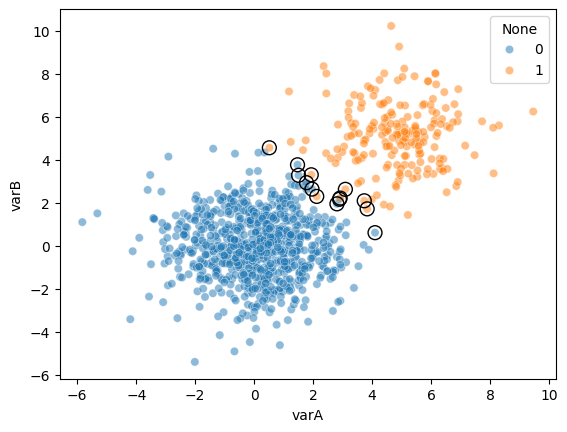

In [7]:
# mark the support vectors
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

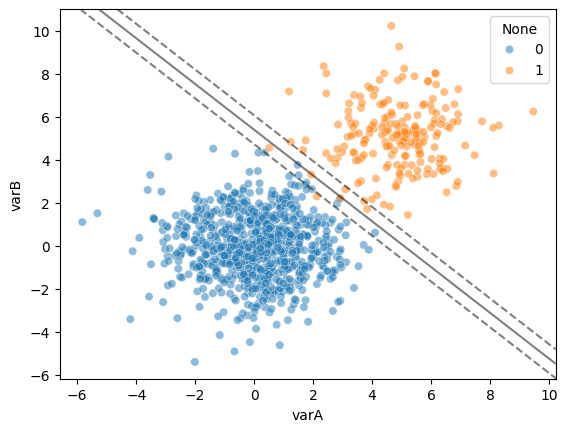

In [8]:
# plot the decision boundaries
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

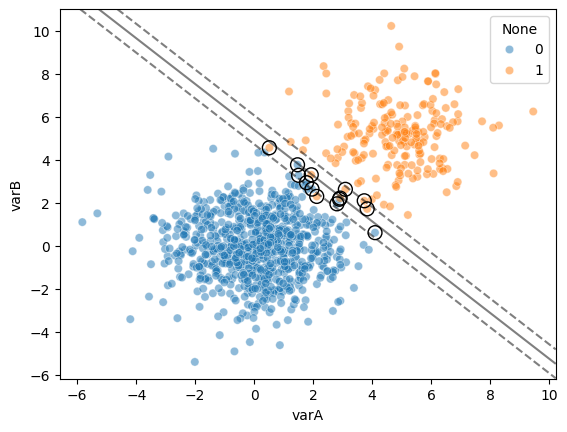

In [9]:
sns.scatterplot(
    data=X, x='varA', y='varB', hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

## SVM SMOTE

In [10]:
sm = SVMSMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,  # neighbours to create synthetic examples,
    m_neighbors=10, # neighbours to determine if minority class is in danger
    svm_estimator=svm.SVC(kernel='linear'),
)

# remember that the templates are those minority observations
# within the danger zone
# create the synthetic examples
X_res, y_res = sm.fit_resample(X, y)

In [11]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# size of oversampled data
X_res.shape, y_res.shape

((1600, 2), (1600,))

In [13]:
# number of minority class observations
y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

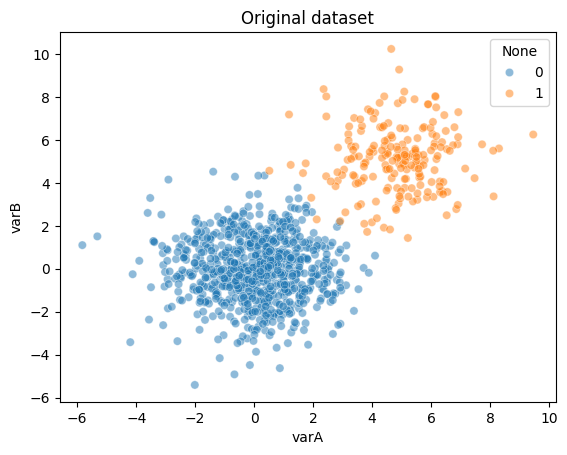

In [14]:
# plot of original data
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

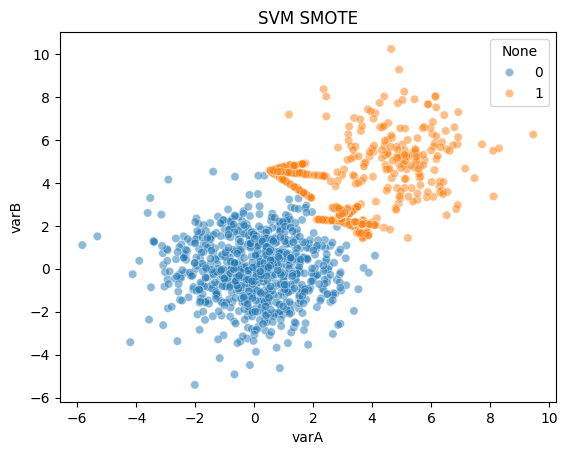

In [15]:
# plot of oversampled data
sns.scatterplot(
    data=X_res, x="varA", y="varB", hue=y_res, alpha=0.5
)

plt.title('SVM SMOTE')
plt.show()

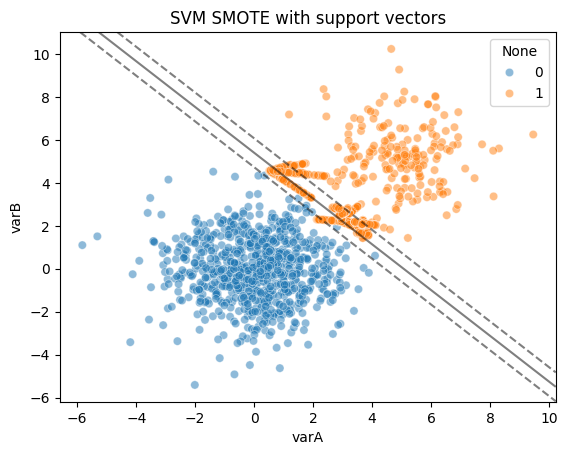

In [17]:
# plot of oversampled data
sns.scatterplot(
    data=X_res, x="varA", y="varB", hue=y_res, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.title('SVM SMOTE with support vectors')
plt.show()

We can see that most of the synthetic examples were created closer to the support vectors from the minority class, within the decision boundary from the SVM.